In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
file_path = r"H:\CAP Data Analytics\ML CHURN PORTFOLIO PROJECT\SELF\Prediction_data.xlsx"
sheet_name = "vw_churndata"

df=pd.read_excel(file_path,sheet_name=sheet_name)

In [52]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Other,Other
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Other,Other
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [62]:
df=df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [63]:
#Convering objects in to numerical

columns_to_encode=df.select_dtypes(include=['object']).drop(columns=['Customer_Status'])
label_encoder={}
for i in columns_to_encode:
    label_encoder[i] = LabelEncoder()
    df[i]=label_encoder[i].fit_transform(df[i])

In [65]:
#Manually encoding target variable churn status to numrical:
df['Customer_Status']=df['Customer_Status'].map({'Stayed':0, 'Churned':1})

In [66]:
# Splitting the data into features and targets
y=df['Customer_Status']
x=df.drop('Customer_Status', axis=1)


0    0
1    0
2    1
3    1
4    1
Name: Customer_Status, dtype: int64

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

In [68]:
# Train Random forest model

rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)

rf_model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [73]:
# Evaluating the model

y_pred= rf_model.predict(x_test)
print("confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print("classification report")
print(classification_report(y_test,y_pred))

confusion Matrix:
[[791  50]
 [125 236]]
classification report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.83      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



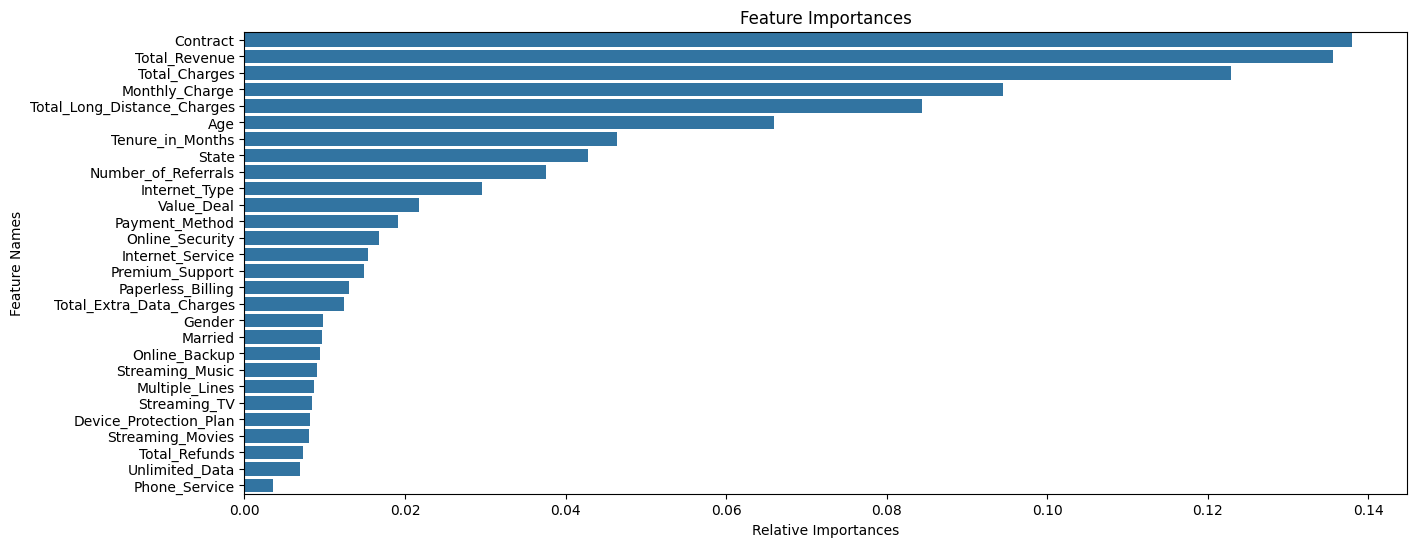

In [83]:
# Feature selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title("Feature Importances")
plt.xlabel("Relative Importances")
plt.ylabel("Feature Names")
plt.show()

In [97]:
#New data
sheet_name2="vw_joindata"
df2=pd.read_excel(file_path,sheet_name=sheet_name2)
df2.head()
#Preserving the data set 
original_data = df2.copy()

#Retaining the customer id
cistomer_ids=df2['Customer_ID']


In [98]:
# Now we cn drop the column that are not needed as we have preserved the columns
df2 = df2.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'], axis=1)


In [102]:
#encoding the categorical columns

for i in df2.select_dtypes(include=['object']):
    df2[i] = LabelEncoder().fit_transform(df2[i])

#Make prediction
new_prediction = rf_model.predict(df2)

In [104]:
#Add prediction to table in a new column!
original_data['Customer_prediction']= new_prediction

In [110]:
#Applying filter to get only those data which got churned
original_data= original_data[original_data['Customer_prediction'] == 1]

original_data.to_csv(r"H:\CAP Data Analytics\ML CHURN PORTFOLIO PROJECT\SELF\predicted_data.csv",index=False)